In [1]:
import pandas as pd
import json
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
file = 'Resources/Chicago_temp_and_cases_data_df.csv'
total_case_data_Chi = pd.read_csv(file)
total_case_data_Chi.head()

,dt_iso,city_name,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,totalcases,totaldeaths
0,3/18/2020,Chicago,41.878114,-87.629798,40.431667,32.825667,38.399000,42.311000,1019.666667,70.800000,7.268000,162,1
1,3/19/2020,Chicago,41.878114,-87.629798,43.077317,36.438537,40.516829,45.446585,1014.097561,96.926829,8.807561,184,2
2,3/20/2020,Chicago,41.878114,-87.629798,47.291250,38.211667,43.529167,50.398750,1011.875000,85.375000,14.475000,155,0
3,3/21/2020,Chicago,41.878114,-87.629798,30.194583,17.966250,28.536250,32.004583,1032.375000,61.541667,12.611667,125,2
4,3/22/2020,Chicago,41.878114,-87.629798,30.493704,21.055926,28.730370,32.875185,1029.888889,67.370370,8.061111,169,2


In [3]:
total_case_data_Chi.columns

Index(['dt_iso', 'city_name', 'lat', 'lon', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'totalcases',
       'totaldeaths'],
      dtype='object')

In [11]:
total_case_data_Chi.dtypes

dt_iso          object
city_name       object
lat            float64
lon            float64
temp           float64
feels_like     float64
temp_min       float64
temp_max       float64
pressure       float64
humidity       float64
wind_speed     float64
totalcases      object
totaldeaths      int64
dtype: object

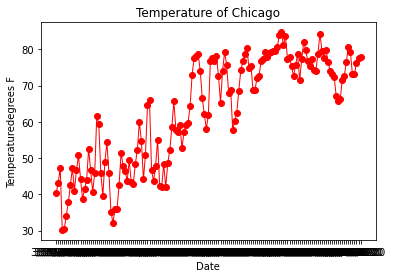

In [12]:
xvalue = total_case_data_Chi['dt_iso'].astype(str)
yvalue = total_case_data_Chi['temp']
cases = total_case_data_Chi['totalcases']
plt.plot(xvalue, yvalue, marker='o', color='red', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Temperature' 
           'degrees F')

plt.title('Temperature of Chicago')
plt.savefig('Resources/Temperature_of_Chi.jpg')
plt.show()
           

In [5]:
temperatures =  total_case_data_Chi['temp']
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.075625
The upper quartile of temperatures is: 76.74708333500001
The interquartile range of temperatures is: 28.67145833500001
The the median of temperatures is: 66.19708333 
Values below 5.0684374974999855 could be outliers.
Values above 119.75427083750003 could be outliers.


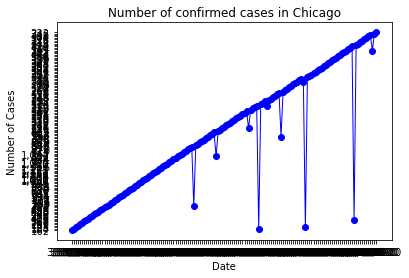

In [6]:
xvalue = total_case_data_Chi['dt_iso']

cases = total_case_data_Chi['totalcases']
plt.plot(xvalue, cases, marker='o', color='blue', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Number of Cases') 
plt.savefig('Resources/Cases_and_dates_for_Chi.jpg')          
plt.title('Number of confirmed cases in Chicago')
plt.savefig('Resources/Number_of_total_cases_Chicago.jpg')
plt.show()

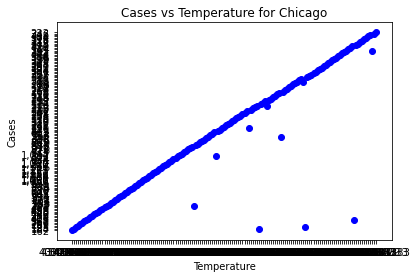

In [13]:
yvalue = total_case_data_Chi['temp'].astype(str)
cases = cases = total_case_data_Chi['totalcases']
plt.scatter(yvalue, cases, marker='o', color='blue',)
plt.xlabel('Temperature')
plt.ylabel('Cases')
plt.title('Cases vs Temperature for Chicago')
plt.savefig('Resources/Cases_vs_Temperature_for_Chicago.jpg')
plt.show()


In [14]:
x_values = total_case_data_Chi['temp'].astype
y_values = total_case_data_Chi['totalcases'].astype(str)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Temperature')
plt.ylabel('Total Cases')
plt.savefig('Resources/Temperature_vs_Cases_for_Chicago.jpg')
print(f"The r-squared is: {rvalue**2}")
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'